In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set(style='darkgrid')


the above is just for importing scripts

the below is a single import of fortune 500 data

In [2]:
df=pd.read_csv('fortune500.csv')

this csv file is now loaded as a 'DataFrame' and is a table.  you can observe the table by running the below code:

In [3]:
df.head()

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1


now you can observe these data, you can also look at the tail by running the function df.tail()

this dataframe basically runs as a table, so you have column names

In [10]:
df.columns

Index(['Year', 'Rank', 'Company', 'Revenue (in millions)',
       'Profit (in millions)'],
      dtype='object')

In [26]:
df.columns = ['year', 'rank', 'company', 'revenue',
       'profit']

* you can adjust the colums by assigning df.colums = ['col 1 name' and so on]
* you can observe the size of the matrix here

In [27]:
len(df)

25500

In [28]:
df.dtypes

year         int64
rank         int64
company     object
revenue    float64
profit      object
dtype: object

It looks like when panda imports a column that has multiple datatypes, it returns an object so that its adaptable.  for this, you need to cast each column into an operable datatype

In [29]:
nonnumeric_profits = df.profit.str.contains('[^0-9.-]')
df.loc[nonnumeric_profits].head()

,year,rank,company,revenue,profit
228,1955,229,Norton,135.0,N.A.
290,1955,291,Schlitz Brewing,100.0,N.A.
294,1955,295,Pacific Vegetable Oil,97.9,N.A.
296,1955,297,Liebmann Breweries,96.0,N.A.
352,1955,353,Minneapolis-Moline,77.4,N.A.


The tutorial says to remove them, as they are missing values- they examine these cells first

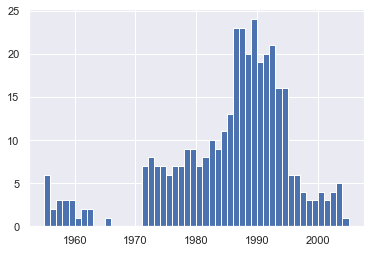

In [30]:
bin_sizes,_,_=plt.hist(df.year[nonnumeric_profits], bins=range(1955, 2006))

This shows that most of these missing values were in the 1990s, lets see if we can figure out the ranks


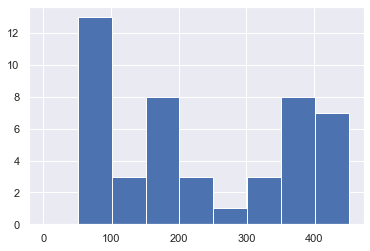

In [32]:
bin_sizes,_,_=plt.hist(df.revenue[nonnumeric_profits], bins=range(1, 500,50))

Okay, lets delete these values and then cast the data to numeric

In [35]:
df=df.loc[~nonnumeric_profits]
df.profit = df.profit.apply(pd.to_numeric)

In [36]:
df.dtypes

year         int64
rank         int64
company     object
revenue    float64
profit     float64
dtype: object

In [38]:
len(df)

25131

# this ends our data scrubbing phase
I think now we will be analyzing the data

First here we group our values by year, and get the average revenue and profit by year. then we show the header of that to see what those data look like

In [39]:
group_by_year = df.loc[:, ['year','revenue','profit']].groupby('year')
avgs = group_by_year.mean()
avgs.head()

,revenue,profit
year,,
1955,275.754453,16.732186
1956,323.604418,22.509237
1957,350.037626,23.181087
1958,377.977264,23.456740
1959,355.229376,19.279276


Now we will plot them out

In [43]:
x=avgs.index
y1=avgs.profit
def plot(x,y,ax,title,y_label):
    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.plot(x,y1)
    ax.margins(x=0,y=0)

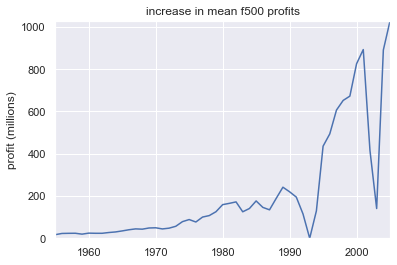

In [44]:
fig, ax = plt.subplots()
plot(x,y1,ax,'increase in mean f500 profits','profit (millions)')